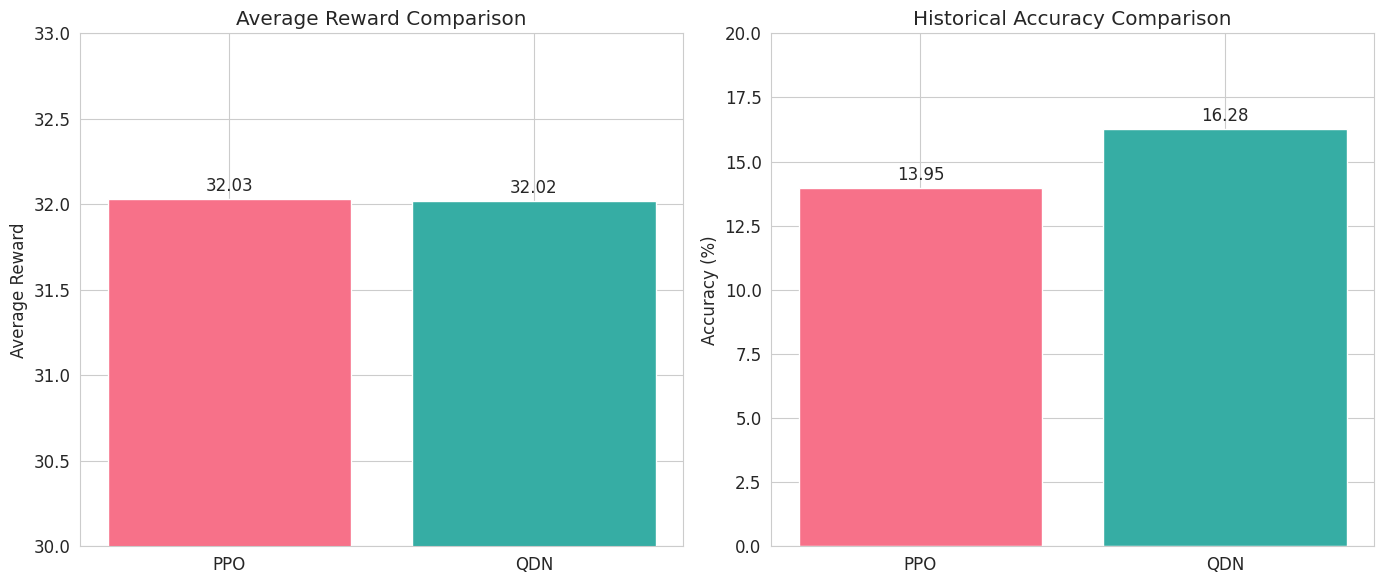

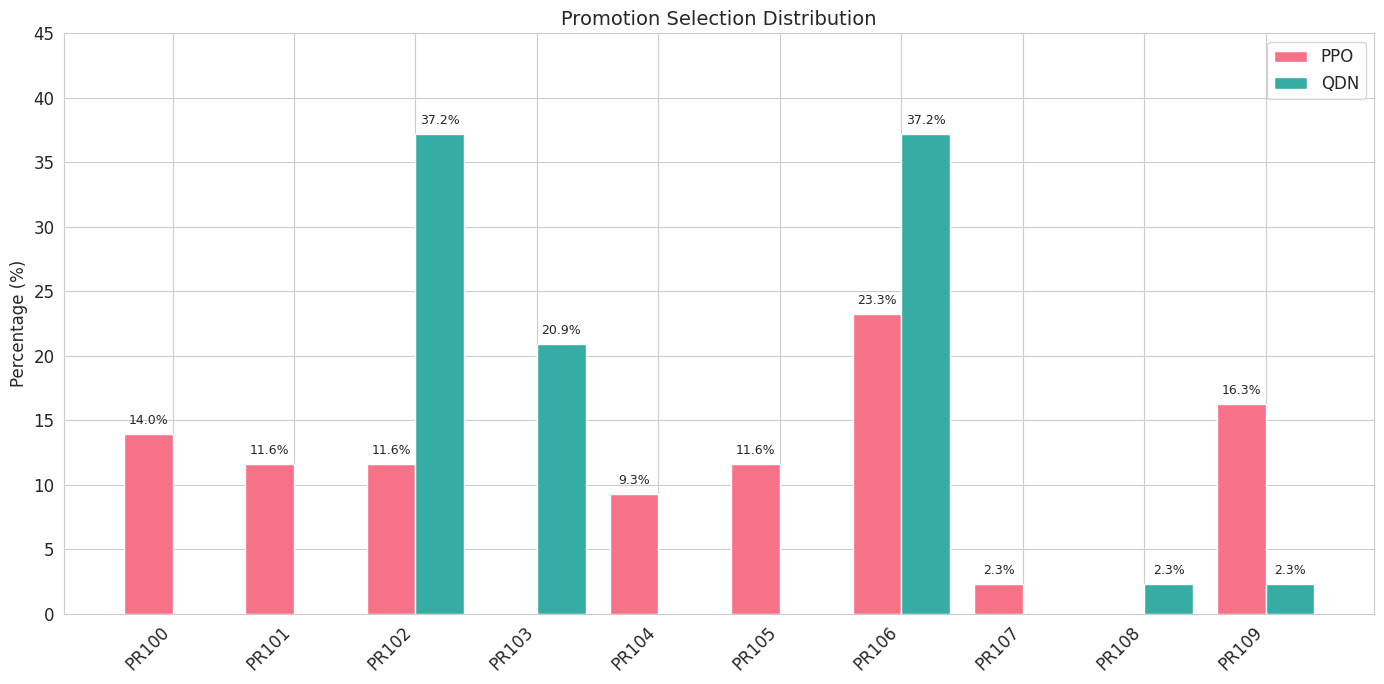

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
colors = sns.color_palette("husl", 2)

data = {
    'PPO': {
        'avg_reward': 32.03,
        'accuracy': 13.95,
        'actions': [6, 5, 5, 0, 4, 5, 10, 1, 0, 7]
    },
    'QDN': {
        'avg_reward': 32.02,
        'accuracy': 16.28,
        'actions': [0, 0, 16, 9, 0, 0, 16, 0, 1, 1]
    }
}

promotions = ['PR100', 'PR101', 'PR102', 'PR103', 'PR104',
             'PR105', 'PR106', 'PR107', 'PR108', 'PR109']

def plot_metrics_comparison():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    rects1 = ax1.bar(['PPO', 'QDN'],
                    [data['PPO']['avg_reward'], data['QDN']['avg_reward']],
                    color=colors)
    ax1.set_ylabel('Average Reward')
    ax1.set_title('Average Reward Comparison')
    ax1.set_ylim(30, 33)
    autolabel(rects1, ax1)

    rects2 = ax2.bar(['PPO', 'QDN'],
                    [data['PPO']['accuracy'], data['QDN']['accuracy']],
                    color=colors)
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Historical Accuracy Comparison')
    ax2.set_ylim(0, 20)
    autolabel(rects2, ax2)

    plt.tight_layout()
    plt.savefig('metrics_comparison.png', bbox_inches='tight')
    plt.show()

def plot_action_distribution():
    plt.figure(figsize=(14, 7))

    ppo_percent = [count/43*100 for count in data['PPO']['actions']]
    qdn_percent = [count/43*100 for count in data['QDN']['actions']]

    x = np.arange(len(promotions))
    width = 0.4

    plt.bar(x - width/2, ppo_percent, width, label='PPO', color=colors[0])
    plt.bar(x + width/2, qdn_percent, width, label='QDN', color=colors[1])

    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Promotion Selection Distribution', fontsize=14)
    plt.xticks(x, promotions, rotation=45, ha='right')
    plt.legend()

    for i, (ppo, qdn) in enumerate(zip(ppo_percent, qdn_percent)):
        if ppo > 0:
            plt.text(i - width/2, ppo + 0.5, f'{ppo:.1f}%',
                    ha='center', va='bottom', fontsize=9)
        if qdn > 0:
            plt.text(i + width/2, qdn + 0.5, f'{qdn:.1f}%',
                    ha='center', va='bottom', fontsize=9)

    plt.ylim(0, 45)
    plt.tight_layout()
    plt.savefig('action_distribution.png', bbox_inches='tight')
    plt.show()

plot_metrics_comparison()
plot_action_distribution()